# Data Visualization and Modeling of the Heart Failure Dataset





## Outline

- Data Visualization

- Recursive feature elimination with cross validation

- Tree based feature selection methods with random forest


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

## Data Analysis

### Heart Failure Prediction Dataset

We are creating a model to predict the mortality caused by heart failure. 

### About this dataset

"Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help." 

Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). (link)

https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

### Feature Information

1) age - age of the patient

2) anaemie - decrease of red blood cells or hemoglobin

3) creatinine phosphokinase - Level of the CPK enzyme in the blood (mcg/L)

4) diabetes - if they have it or not (boolean, 0 - no / 1 - yes)

5) ejection fraction - Percentage of blood leaving the heart at each contraction (percentage)

6) high blood pressure - if they have it or not (boolean, 0 - no / 1 - yes)

7) platelets - Platelets in the blood (kiloplatelets/mL)

8) serum creatine - Level of serum creatinine in the blood (mg/dL)

9) serum sodium - Level of serum sodium in the blood (mEq/L)

10) sex - (0 - woman / 1 - man)

11) smoking - (0 - no / 1 - yes)

12) time - Follow-up period (days)

13) DEATH EVENT - If the patient deceased during the follow-up period (boolean) (0 - no / 1 - yes)



In [2]:
heart_dat = pd.read_csv('heart.csv')
heart_dat.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
heart_dat.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
heart_dat.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Below we are seperating the features from the target variable 'DEATH_EVENT'.

In [5]:
# y includes our labels and x includes our features
dlist = ['DEATH_EVENT']
x = heart_dat.drop(dlist, axis=1)
y = heart_dat['DEATH_EVENT']
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


Number of Deaths:  96
Number Alive :  203


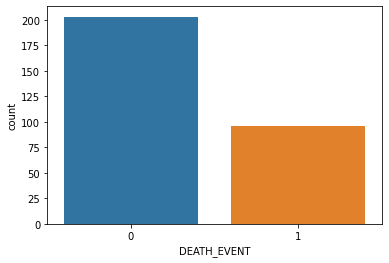

In [6]:
ax = sns.countplot(y,label="Count")       # Deaths = 96, Alive = 203
N, Y = y.value_counts()                   # 1 - Deaths, 0 - Alive
print('Number of Deaths: ',Y)
print('Number Alive : ',N)

In [7]:
x.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000


# Visualization

### Standarization

In order to see how each feature compares to another we must make sure they are all on the same "playing field" and standardize/ normalize the data througgh the following formula:

the formula $$ Z = \frac{x - \mu}{\sigma} $$

This just puts every feature on the same scale for cleaner more informative data vizualization.

### 0  -  Alive / 1 - Death



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'anaemia'),
  Text(2, 0, 'creatinine_phosphokinase'),
  Text(3, 0, 'diabetes'),
  Text(4, 0, 'ejection_fraction'),
  Text(5, 0, 'high_blood_pressure'),
  Text(6, 0, 'platelets'),
  Text(7, 0, 'serum_creatinine'),
  Text(8, 0, 'serum_sodium'),
  Text(9, 0, 'sex'),
  Text(10, 0, 'smoking'),
  Text(11, 0, 'time')])

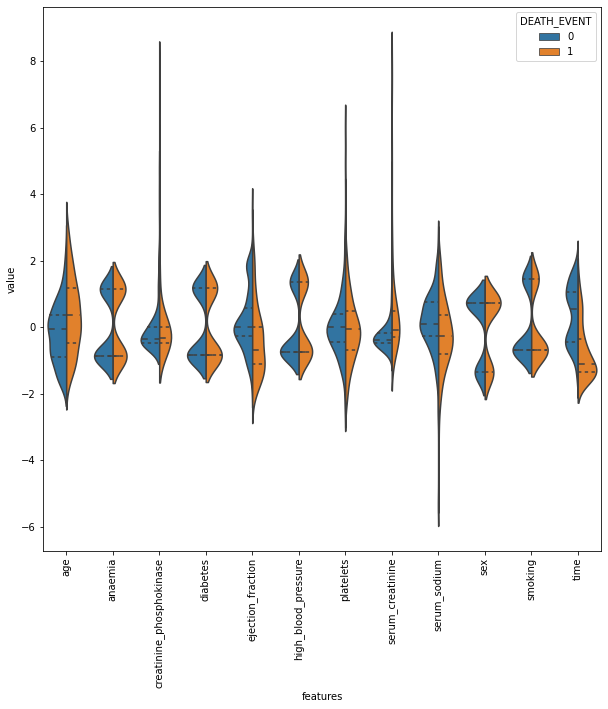

In [8]:
heart_dat_dia = y
heart_dat_n_2 = (x - x.mean()) / (x.std())              # standardization
data = pd.concat([y,heart_dat_n_2.iloc[:,0:12]],axis=1)
data = pd.melt(data,id_vars="DEATH_EVENT",
                    var_name="features",
                    value_name='value') 
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="DEATH_EVENT", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Here we can see that *age, creatine_phosphokinase, ejection_fraction, serum_creatine, serum_sodium, and time* all appear to be seperated enough to be useful in our calculations. This is just face value interpretation and must be explored further.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'anaemia'),
  Text(2, 0, 'creatinine_phosphokinase'),
  Text(3, 0, 'diabetes'),
  Text(4, 0, 'ejection_fraction'),
  Text(5, 0, 'high_blood_pressure'),
  Text(6, 0, 'platelets'),
  Text(7, 0, 'serum_creatinine'),
  Text(8, 0, 'serum_sodium'),
  Text(9, 0, 'sex'),
  Text(10, 0, 'smoking'),
  Text(11, 0, 'time')])

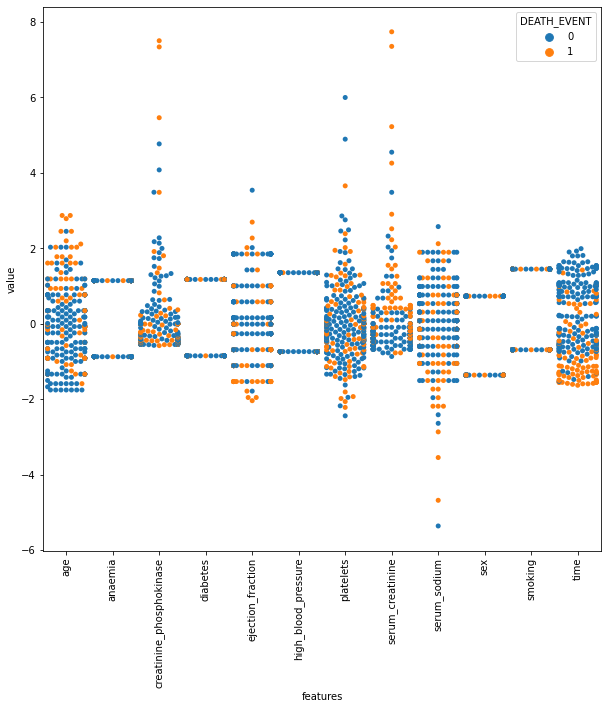

In [9]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="DEATH_EVENT", data=data)
plt.xticks(rotation=90)

Here we can see *age and time* seem to be seperated the best out of all of the features.

array([[<AxesSubplot:xlabel='platelets', ylabel='platelets'>,
        <AxesSubplot:xlabel='serum_creatinine', ylabel='platelets'>,
        <AxesSubplot:xlabel='serum_sodium', ylabel='platelets'>,
        <AxesSubplot:xlabel='time', ylabel='platelets'>,
        <AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>],
       [<AxesSubplot:xlabel='platelets', ylabel='serum_creatinine'>,
        <AxesSubplot:xlabel='serum_creatinine', ylabel='serum_creatinine'>,
        <AxesSubplot:xlabel='serum_sodium', ylabel='serum_creatinine'>,
        <AxesSubplot:xlabel='time', ylabel='serum_creatinine'>,
        <AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>],
       [<AxesSubplot:xlabel='platelets', ylabel='serum_sodium'>,
        <AxesSubplot:xlabel='serum_creatinine', ylabel='serum_sodium'>,
        <AxesSubplot:xlabel='serum_sodium', ylabel='serum_sodium'>,
        <AxesSubplot:xlabel='time', ylabel='serum_sodium'>,
        <AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'

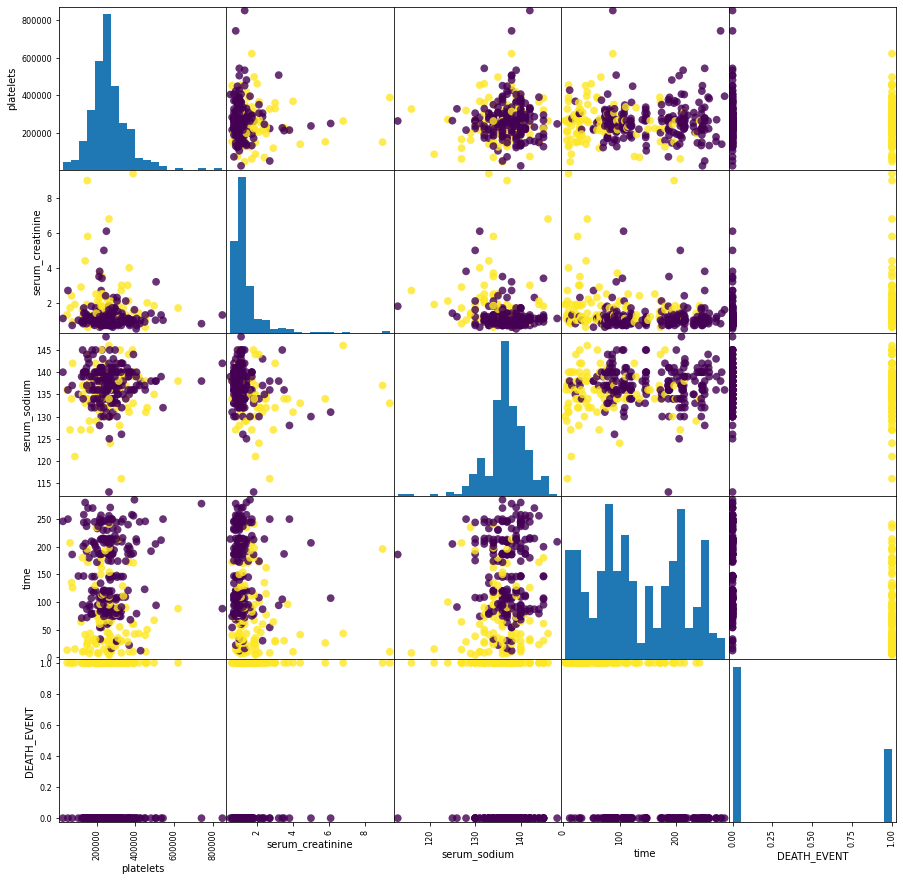

In [10]:
plot_1 = heart_dat.drop(['anaemia',
       'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'age', 'creatinine_phosphokinase','ejection_fraction'],axis=1)
pd.plotting.scatter_matrix(plot_1, c=y, figsize=(15, 15),
 marker='o', hist_kwds={'bins': 20}, s=60,
 alpha=.8)

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='age'>,
        <AxesSubplot:xlabel='ejection_fraction', ylabel='age'>,
        <AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='creatinine_phosphokinase'>,
        <AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='creatinine_phosphokinase'>,
        <AxesSubplot:xlabel='ejection_fraction', ylabel='creatinine_phosphokinase'>,
        <AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>],
       [<AxesSubplot:xlabel='age', ylabel='ejection_fraction'>,
        <AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='ejection_fraction'>,
        <AxesSubplot:xlabel='ejection_fraction', ylabel='ejection_fraction'>,
        <AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>],
       [<AxesSubplot:xlabel='age', ylabel='DEATH_EVENT'>,
        <AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='DEATH_

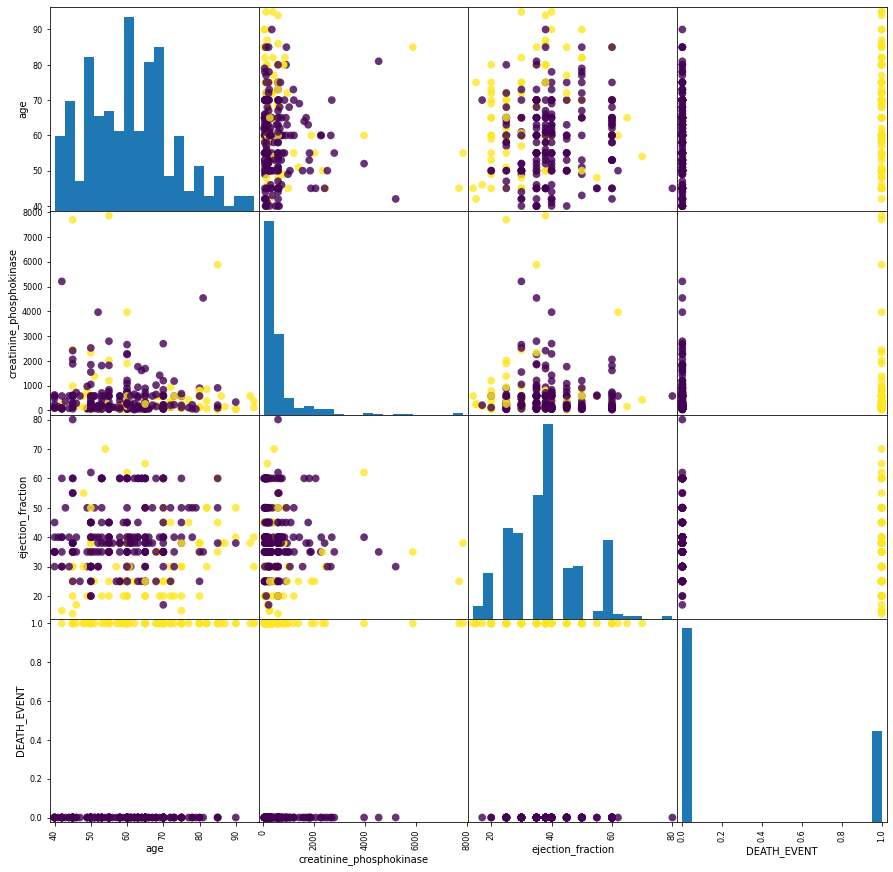

In [11]:
plot_2 = heart_dat.drop(['anaemia',
       'diabetes', 'high_blood_pressure', 'sex', 'smoking','platelets', 'serum_creatinine', 'serum_sodium','time'],axis=1)
pd.plotting.scatter_matrix(plot_2, c=y, figsize=(15, 15),
 marker='o', hist_kwds={'bins': 20}, s=60,
 alpha=.8)

## Feature Selection


In [12]:
#split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

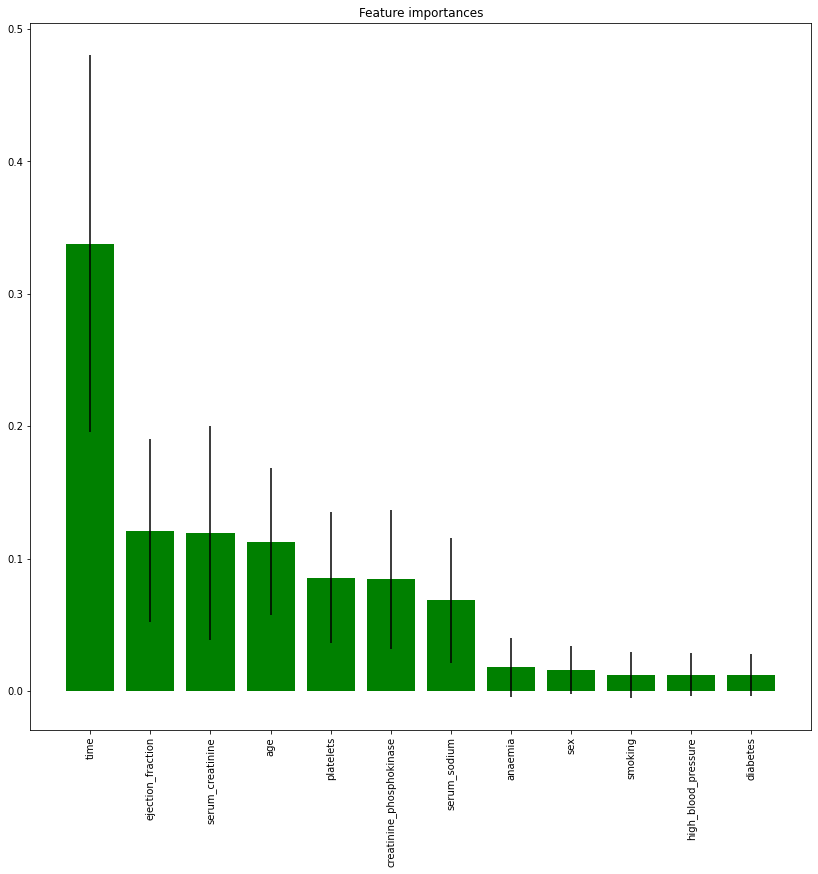

In [13]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [14]:
x = x.drop(['sex', 'high_blood_pressure', 'diabetes', 'smoking', 'anaemia', 'serum_sodium',
           'platelets', 'creatinine_phosphokinase'], axis=1)

In [15]:
x.head()

,age,ejection_fraction,serum_creatinine,time
0,75.0,20,1.9,4
1,55.0,38,1.1,6
2,65.0,20,1.3,7
3,50.0,20,1.9,7
4,65.0,20,2.7,8


## Hyperparameter Tuning and Model Selection

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Feature Scaling

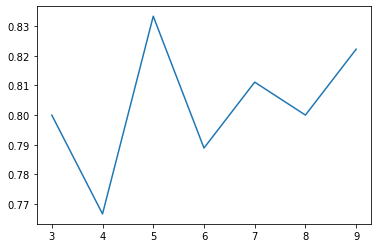

In [18]:
# hyperparameter tuning of K Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

scores = []

for neighbors in range(3,10):
    clf_nn = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    
    clf_nn.fit(x_train, y_train)
    y_pred = clf_nn.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))
    
plt.plot(list(range(3,10)), scores)
plt.show()

Train accuracy is:  0.8660287081339713
Test accuracy is:  0.8333333333333334


<AxesSubplot:>

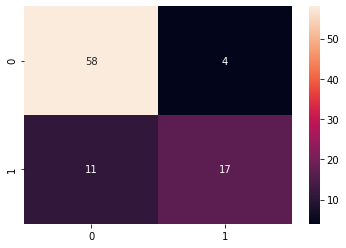

In [19]:
# KNN classifier
clf_nn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
    
clf_nn.fit(x_train, y_train)
y_pred = clf_nn.predict(x_test)


actrain = accuracy_score(y_train,clf_nn.predict(x_train))
print('Train accuracy is: ',actrain)
ac = accuracy_score(y_test,clf_nn.predict(x_test))
print('Test accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_nn.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

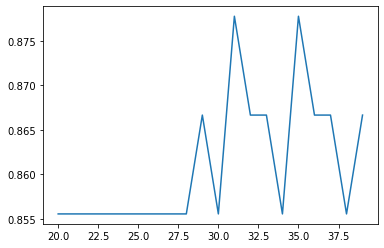

In [20]:
# hyperparameter tuning of Random Forest Classifier

scores = []

for estimator in range(20,40):
    clf_rf = RandomForestClassifier(n_estimators=estimator,
                                random_state=0, criterion='entropy')
    clf_rf.fit(x_train,y_train)
    y_pred = clf_rf.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    
#plot
plt.plot(list(range(20,40)),scores)
plt.show()
        

Train accuracy is:  0.8888888888888888
Test accuracy is:  0.8777777777777778


<AxesSubplot:>

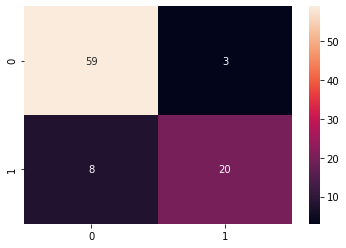

In [26]:
# Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=31,
                                random_state=0, criterion='entropy')
clf_rf.fit(x_train,y_train)
y_pred = clf_rf.predict(x_test)

actrain = accuracy_score(y_train,clf_rf.predict(x_train))
print('Train accuracy is: ',ac)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Test accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

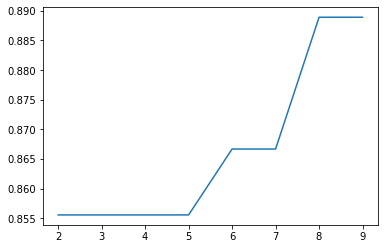

In [22]:
# hyperparameter tuning of Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

scores = []

for leaves in range(2,10):
    clf_dt = DecisionTreeClassifier(max_leaf_nodes=leaves, random_state=0,
                                   criterion='entropy')
    clf_dt.fit(x_train,y_train)
    y_pred = clf_dt.predict(x_test)
    
    scores.append(accuracy_score(y_test,y_pred))
    
plt.plot(list(range(2,10)), scores)
plt.show()

Train accuracy is:  0.861244019138756
Test accuracy is:  0.8888888888888888


<AxesSubplot:>

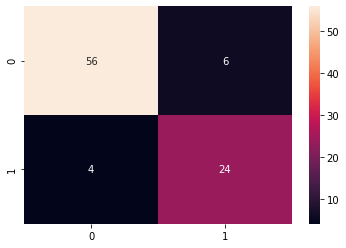

In [25]:
# Decision Tree Classifier
clf_dt = DecisionTreeClassifier(max_leaf_nodes=9, random_state=0,
                                   criterion='entropy')
clf_dt.fit(x_train,y_train)
y_pred = clf_dt.predict(x_test)

actrain = accuracy_score(y_train,clf_dt.predict(x_train))
print('Train accuracy is: ',actrain)
    
ac = accuracy_score(y_test,clf_dt.predict(x_test))
print('Test accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_dt.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

## Final Model

Here we use all of the data to train the model to get the most use out of the data we are given. It is common practice to create the final model using all of the data after the training and validation has been completed.